<a href="https://colab.research.google.com/github/HungPham2002/Non-Linear-Regression-to-Multivariable-non-Linear-Regression/blob/main/Non_Linear_Regression_Salaries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/AIO Project/Linear (non Linear) Regression    Sales Prediction

[Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/AIO Project/Linear (non Linear) Regression Sales Prediction'
/content


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#1.Load Data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AIO Project/Linear (non Linear) Regression    Sales Prediction/data/Salaries.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [ ]:
X = df.Level
X

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
Name: Level, dtype: int64

In [ ]:
y = df.Salary
y

0      45000
1      50000
2      60000
3      80000
4     110000
5     150000
6     200000
7     300000
8     500000
9    1000000
Name: Salary, dtype: int64

Text(0, 0.5, 'Salary')

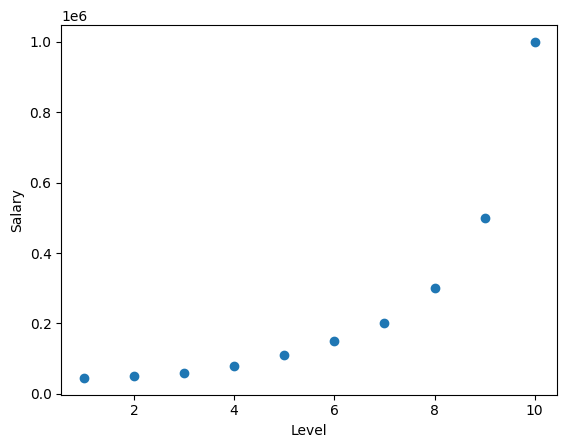

In [ ]:
plt.scatter(X, y)
plt.xlabel("Level")
plt.ylabel("Salary")

#2.Linear Regression

In [ ]:
def r2score(y_pred, y):
    rss = np.sum((y_pred - y) ** 2)
    tss = np.sum((y-y.mean()) ** 2)

    r2 = 1 - (rss / tss)
    return r2

In [ ]:
class LinearRegression:
    def __init__(self, X_data, y_target, learning_rate=0.01, num_epochs=10000):
        self.X_data = X_data
        self.y_target = y_target
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.num_samples = self.X_data.shape[0]

        # Initial Coefficients
        self.theta = np.random.randn(self.X_data.shape[1])
        self.losses = []

    def compute_loss(self, y_pred, y_target):
        loss = (y_pred-y_target)*(y_pred-y_target)
        loss = np.mean(loss)
        return loss

    def predict(self, X_data):
        y_pred = X_data.dot(self.theta)  # N(samples) x d(features)
        return y_pred

    def fit(self):
        for epoch in range(self.num_epochs):
            # predict
            y_pred = self.predict(self.X_data)

            # compute loss
            loss = self.compute_loss(y_pred, self.y_target)
            self.losses.append(loss)

            # compute gradient
            k = 2*(y_pred-self.y_target)
            gradients = self.X_data.T.dot(k)/self.num_samples

            # update weight
            self.theta = self.theta - self.learning_rate*gradients

            print(f'Epoch: {epoch} - Loss: {loss}')

        return {
            'loss': sum(self.losses)/len(self.losses),
            'weight': self.theta
        }

## Example

In [ ]:
X = np.array([0,1,2,3,4,5,6,7])
y = np.array([8,15,18,22,26,30,38,47])

In [ ]:
X = X.reshape(-1,1)
X

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7]])

Text(0, 0.5, 'Salary')

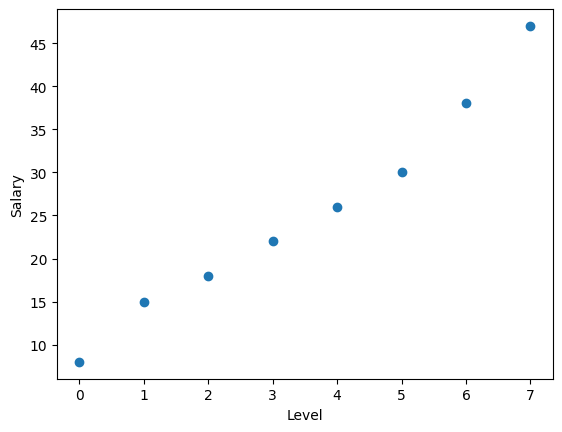

In [ ]:
plt.scatter(X,y)
plt.xlabel("Level")
plt.ylabel("Salary")

In [ ]:
X_linear = np.hstack((np.ones((X.shape[0], 1)), X))
X_linear

array([[1., 0.],
       [1., 1.],
       [1., 2.],
       [1., 3.],
       [1., 4.],
       [1., 5.],
       [1., 6.],
       [1., 7.]])

In [ ]:
linear_model = LinearRegression(X_linear, y)
linear_model.fit()

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
Epoch: 5000 - Loss: 4.2023809523809526
Epoch: 5001 - Loss: 4.202380952380961
Epoch: 5002 - Loss: 4.20238095238095
Epoch: 5003 - Loss: 4.202380952380949
Epoch: 5004 - Loss: 4.202380952380955
Epoch: 5005 - Loss: 4.2023809523809526
Epoch: 5006 - Loss: 4.20238095238095
Epoch: 5007 - Loss: 4.202380952380956
Epoch: 5008 - Loss: 4.202380952380955
Epoch: 5009 - Loss: 4.202380952380944
Epoch: 5010 - Loss: 4.2023809523809526
Epoch: 5011 - Loss: 4.202380952380962
Epoch: 5012 - Loss: 4.202380952380951
Epoch: 5013 - Loss: 4.202380952380955
Epoch: 5014 - Loss: 4.20238095238095
Epoch: 5015 - Loss: 4.202380952380946
Epoch: 5016 - Loss: 4.202380952380951
Epoch: 5017 - Loss: 4.202380952380954
Epoch: 5018 - Loss: 4.202380952380955
Epoch: 5019 - Loss: 4.2023809523809526
Epoch: 5020 - Loss: 4.20238095238095
Epoch: 5021 - Loss: 4.202380952380958
Epoch: 5022 - Loss: 4.202380952380953
Epoch: 5023 - Loss: 4.20238095238095
Epoch: 5024 - Loss: 4.2023809523

{'loss': 4.446358210678831, 'weight': array([7.66666667, 5.0952381 ])}

In [ ]:
y_pred = linear_model.predict(X_linear)

In [ ]:
r2score(y_pred, y)

0.9700898152855448

In [ ]:
linear_model.theta

array([7.66666667, 5.0952381 ])

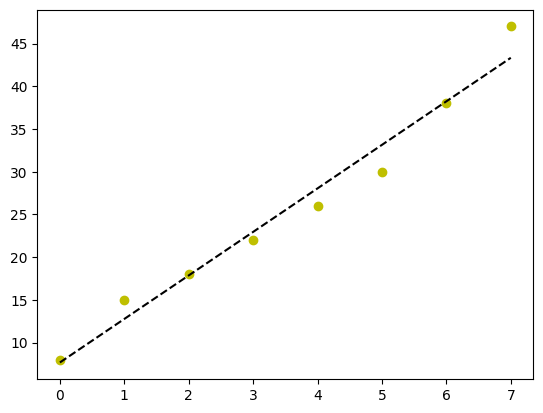

In [ ]:
plt.plot(X, y, 'yo', X, linear_model.theta[1]*X + linear_model.theta[0], '--k')
plt.show()

## Salary

In [ ]:
X

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
Name: Level, dtype: int64

In [ ]:
X_linear = X.values.reshape(-1,1)
X_linear = np.hstack((np.ones((X_linear.shape[0], 1)), X_linear))
X_linear

array([[ 1.,  1.],
       [ 1.,  2.],
       [ 1.,  3.],
       [ 1.,  4.],
       [ 1.,  5.],
       [ 1.,  6.],
       [ 1.,  7.],
       [ 1.,  8.],
       [ 1.,  9.],
       [ 1., 10.]])

In [ ]:
linear_model = LinearRegression(X_linear, y)
linear_model.fit()

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
Epoch: 5000 - Loss: 26695878787.87879
Epoch: 5001 - Loss: 26695878787.87879
Epoch: 5002 - Loss: 26695878787.87879
Epoch: 5003 - Loss: 26695878787.878784
Epoch: 5004 - Loss: 26695878787.87879
Epoch: 5005 - Loss: 26695878787.87879
Epoch: 5006 - Loss: 26695878787.87879
Epoch: 5007 - Loss: 26695878787.87879
Epoch: 5008 - Loss: 26695878787.87879
Epoch: 5009 - Loss: 26695878787.878784
Epoch: 5010 - Loss: 26695878787.878788
Epoch: 5011 - Loss: 26695878787.878784
Epoch: 5012 - Loss: 26695878787.878796
Epoch: 5013 - Loss: 26695878787.87879
Epoch: 5014 - Loss: 26695878787.878784
Epoch: 5015 - Loss: 26695878787.87879
Epoch: 5016 - Loss: 26695878787.878777
Epoch: 5017 - Loss: 26695878787.87879
Epoch: 5018 - Loss: 26695878787.878784
Epoch: 5019 - Loss: 26695878787.878788
Epoch: 5020 - Loss: 26695878787.878784
Epoch: 5021 - Loss: 26695878787.878784
Epoch: 5022 - Loss: 26695878787.87879
Epoch: 5023 - Loss: 26695878787.878784
Epoch: 5024 - Loss:

{'loss': 26812262525.151844,
 'weight': array([-195333.33333333,   80878.78787879])}

In [ ]:
y_pred = linear_model.predict(X_linear)

In [ ]:
r2score(y_pred,y)

0.6690412331929895

In [ ]:
linear_model.theta

array([-195333.33333333,   80878.78787879])

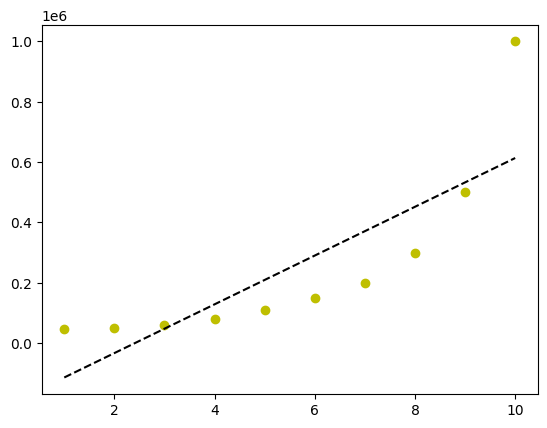

In [ ]:
plt.plot(X,y,'yo', X, linear_model.theta[1]*X + linear_model.theta[0], '--k' )
plt.show()

#3.Polymial Regression

In [ ]:
def create_polynomial_features(X, degree=2):
    """Creates the polynomial features
    Args:
        X: A array tensor for the data.
        degree: A intege for the degree of
        the generated polynomial function.
    """
    X_new = X
    for d in range(2, degree+1):
        X_new = np.c_[X_new, np.power(X, d)]
    return X_new

##3.1.Polymial Regression with degree = 2

In [ ]:
X_poly = create_polynomial_features(X, degree=2)
X_poly

array([[  1,   1],
       [  2,   4],
       [  3,   9],
       [  4,  16],
       [  5,  25],
       [  6,  36],
       [  7,  49],
       [  8,  64],
       [  9,  81],
       [ 10, 100]])

In [ ]:
X_poly = np.hstack((np.ones((X_poly.shape[0], 1)), X_poly))
X_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [ ]:
poly_model = LinearRegression(X_poly, y, learning_rate=0.0001, num_epochs=10000)
poly_model.fit()

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
Epoch: 5000 - Loss: 10675930226.919708
Epoch: 5001 - Loss: 10675810376.339003
Epoch: 5002 - Loss: 10675690551.685108
Epoch: 5003 - Loss: 10675570752.932697
Epoch: 5004 - Loss: 10675450980.05646
Epoch: 5005 - Loss: 10675331233.031118
Epoch: 5006 - Loss: 10675211511.83143
Epoch: 5007 - Loss: 10675091816.432156
Epoch: 5008 - Loss: 10674972146.808111
Epoch: 5009 - Loss: 10674852502.934124
Epoch: 5010 - Loss: 10674732884.78505
Epoch: 5011 - Loss: 10674613292.335773
Epoch: 5012 - Loss: 10674493725.561209
Epoch: 5013 - Loss: 10674374184.43629
Epoch: 5014 - Loss: 10674254668.935984
Epoch: 5015 - Loss: 10674135179.035288
Epoch: 5016 - Loss: 10674015714.709213
Epoch: 5017 - Loss: 10673896275.93281
Epoch: 5018 - Loss: 10673776862.681149
Epoch: 5019 - Loss: 10673657474.92933
Epoch: 5020 - Loss: 10673538112.652485
Epoch: 5021 - Loss: 10673418775.825758
Epoch: 5022 - Loss: 10673299464.424335
Epoch: 5023 - Loss: 10673180178.42342
Epoch: 5024 - 

{'loss': 11093699025.334394,
 'weight': array([ 14601.81560692, -47838.49555661,  12584.3712457 ])}

In [ ]:
y_pred = poly_model.predict(X_poly)
r2score(y_pred, y)

0.8736084013013555

In [ ]:
poly_model.theta

array([ 14601.81560692, -47838.49555661,  12584.3712457 ])

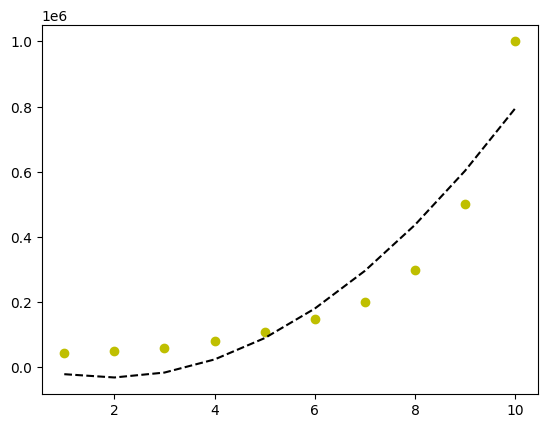

In [ ]:
X_plot = df.Level
y_func = poly_model.theta[2]*X*X + poly_model.theta[1]*X + poly_model.theta[0]
plt.plot(X_plot, y, 'yo', X, y_func, '--k')
plt.show()

##3.2.Polymial Regression with degree = 3

In [ ]:
X_poly = create_polynomial_features(X, degree=3)
X_poly

array([[   1,    1,    1],
       [   2,    4,    8],
       [   3,    9,   27],
       [   4,   16,   64],
       [   5,   25,  125],
       [   6,   36,  216],
       [   7,   49,  343],
       [   8,   64,  512],
       [   9,   81,  729],
       [  10,  100, 1000]])

In [ ]:
X_poly = np.hstack((np.ones((X_poly.shape[0], 1)), X_poly))
X_poly

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

In [ ]:
poly_model = LinearRegression(X_poly, y, learning_rate=0.0000001, num_epochs=10000)
poly_model.fit()

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
Epoch: 5000 - Loss: 6801949091.01426
Epoch: 5001 - Loss: 6801908082.74281
Epoch: 5002 - Loss: 6801867075.6599045
Epoch: 5003 - Loss: 6801826069.765483
Epoch: 5004 - Loss: 6801785065.05952
Epoch: 5005 - Loss: 6801744061.541987
Epoch: 5006 - Loss: 6801703059.212832
Epoch: 5007 - Loss: 6801662058.072044
Epoch: 5008 - Loss: 6801621058.119568
Epoch: 5009 - Loss: 6801580059.35538
Epoch: 5010 - Loss: 6801539061.779444
Epoch: 5011 - Loss: 6801498065.391719
Epoch: 5012 - Loss: 6801457070.192176
Epoch: 5013 - Loss: 6801416076.18077
Epoch: 5014 - Loss: 6801375083.357481
Epoch: 5015 - Loss: 6801334091.722261
Epoch: 5016 - Loss: 6801293101.275087
Epoch: 5017 - Loss: 6801252112.015908
Epoch: 5018 - Loss: 6801211123.944704
Epoch: 5019 - Loss: 6801170137.061439
Epoch: 5020 - Loss: 6801129151.366066
Epoch: 5021 - Loss: 6801088166.858559
Epoch: 5022 - Loss: 6801047183.538877
Epoch: 5023 - Loss: 6801006201.406998
Epoch: 5024 - Loss: 6800965220.4628

{'loss': 6980762652.904341,
 'weight': array([   1.87095293,  -98.8397367 , -534.90740062,  889.76827126])}

In [ ]:
y_pred = poly_model.predict(X_poly)
r2score(y_pred, y)

0.9180402424364067

In [ ]:
poly_model.theta

array([   1.87095293,  -98.8397367 , -534.90740062,  889.76827126])

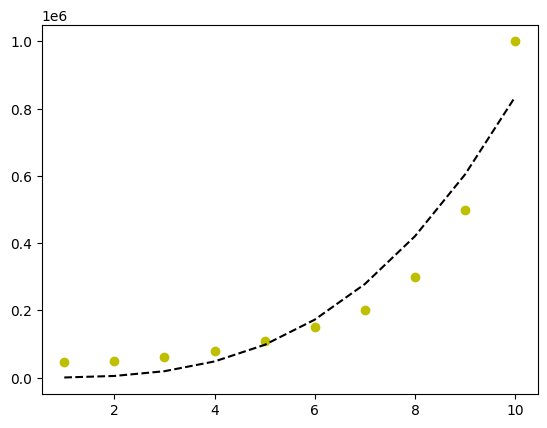

In [ ]:
X_plot = df.Level
y_func = poly_model.theta[3]*X*X*X + poly_model.theta[2]*X*X + poly_model.theta[1]*X + poly_model.theta[0]
plt.plot(X_plot, y, 'yo', X, y_func, '--k')
plt.show()